# Customer Churn Analysis


### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 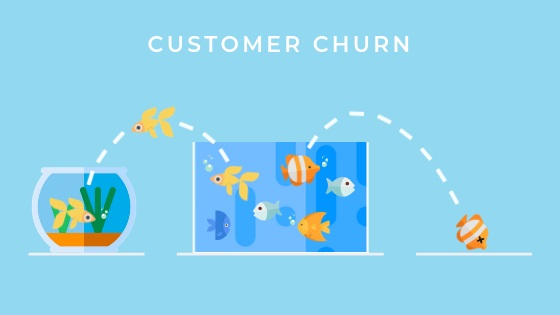

### Step 1: Importing required Libraries, Reading and Understanding the Data

In [1013]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from subprocess import check_output


#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Loading the Dataset

In [3]:
df = pd.read_csv('Customer_churn')
pd.set_option("display.max_columns",None)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [1018]:
df.drop('customerID', inplace = True, axis = 'columns')

In [1019]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Attribute Information


Observations: TotalCharges column contains NaN values.Outoff 7043 rows we drop 11 will not sesult in huge loss of data. So i drops rows having Total_charges entries having 'NaN'

* There are 17 categorical features:
customerID: It refers to Customer ID for each customer this is unique for each customer

gender: This column shows whether the customer is a male or female

SeniorCitizen: This column shows wheather the customer is a senior citizen or not(1, 0)

Partner: This column shows whether the customer has a partner or not (Yes, No)

Dependent: This column shows whether the customer has dependents or not (Yes, No)

PhoneService: This column shows whether the customer has a phone service pr not(Yes, No)

MultipleLines: This column shows whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: This column show the customer's internet service provider(DSL, Fiber optic, No)

OnlineSecurity: This column shows whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: This column shows whether the customer has an online backup or ot(Yes, No, No online internet Backup)

DeviceProtection: This column show whether the customer has device protection or not(Yes, No, No, No internet service)

TechSupport: This column shows wheather the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streamingTv or Not(Yes, No, No internet service)

StreamingMovies: whether the customer has streaming movies or not(Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two years)

PaperlessBilling: The contract term of the customer(Month-to-Month, One year, Two years)

: The customer's payment method(Electronic check, Mailed check, Bank transfer(automatic),Credit card(automatic))

There are 3 numerical features:
Tenure: Number of months the customer has stayed with the company

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

There is a prediction feature:
Churn: whether the customer churned or not (Yes,No)

In [1020]:
#Get Overview of the data
def dataoverview(df,msg):
    print(f'{msg}:\n')
    print('Number of rows:',df.shape[0])
    print('\nNumber of features:',df.shape[1])
    print('\nData Features:')
    print(df.columns.tolist())
    print("\nMissing Values:",df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
dataoverview(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows: 7043

Number of features: 20

Data Features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing Values: 0

Unique values:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


Observation: The dataset has 7043 rows and 21 columns.

In [1021]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [1022]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Observation : only 3 columns having numberic values all rest 17 columns are of object type i.e. having categorical values.

# Step 2: Data Exploring and Data Cleaning

In [1023]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Observation: TotalCharges column has string values need to convert it to numeric.

In [1024]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

Observation: MonthlyCharges has numberic values.

In [1025]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors="coerce")
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [1026]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [1027]:
df['TotalCharges'].isnull().sum()

11

In [1028]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [1029]:
df.iloc[488]['TotalCharges']

nan

In [1030]:
df1 = df.dropna()

Observations: TotalCharges column contains NaN values.Outoff 7043 rows we drop 11 will not sesult in huge loss of data. So drops rows having Total_charges column entries as 'NaN'

In [1031]:
df1['TotalCharges'].isnull().sum()

0

In [1032]:
df1.iloc[:489]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Female,0,Yes,Yes,8,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,680.05,Yes
485,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
486,Female,0,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415.00,No
487,Male,0,No,No,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No


<AxesSubplot:>

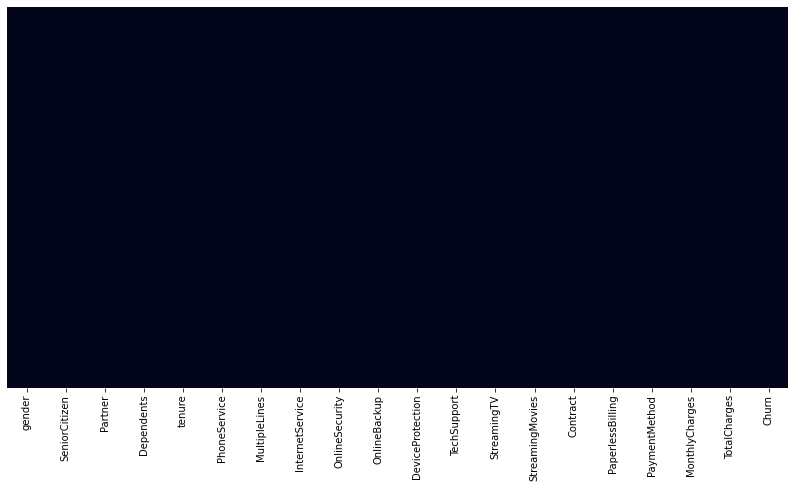

In [1033]:
#Checking for null values
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

Observation: All NaN values are removed.

In [1034]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [1035]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [1036]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Step 3: Data Visualization
EDA: Grapical relationship and distribution of feature variables preset in the data frame.

First explore the target variable 'Churn'

In [1037]:
import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 

target_instance = df1["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

Churn : No-73.5%
Churn : Yes-26.5%
this is the customers who left the company. It's a binary classification problem with an unbalanced target.

<AxesSubplot:xlabel='Churn', ylabel='count'>

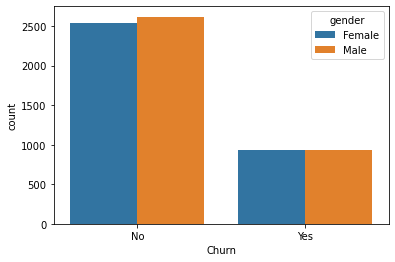

In [1038]:
sns.countplot(x='Churn',data=df1,hue='gender')

Observation: From the above graph,we can see that gender is not a contributing factor for customer churn in this dtat set as the numbers of both the genders, that have or haven't churned, are almost the same.

<AxesSubplot:xlabel='Churn', ylabel='count'>

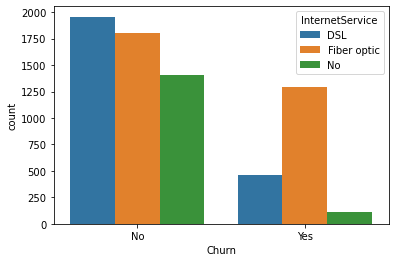

In [1039]:
sns.countplot(x = 'Churn', data = df1, hue = 'InternetService')

Observation: From above Fiber-optic services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

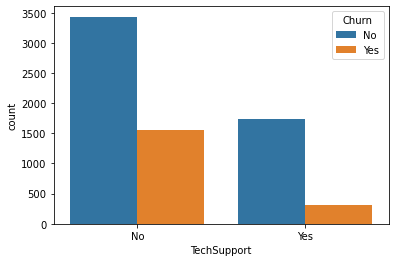

In [1040]:
sns.countplot(x='TechSupport',data= df1, hue='Churn')

Observation: I can see the customers who don't have technical support have churned more. This also highlights the fact that the tech support provided by the company is up to the mark.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

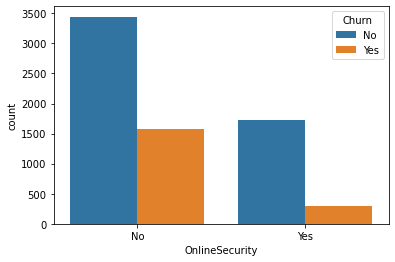

In [1041]:
sns.countplot(x='OnlineSecurity',data= df1, hue='Churn')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

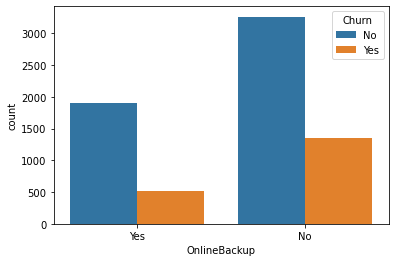

In [1042]:
sns.countplot(x = 'OnlineBackup',data = df1, hue='Churn')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

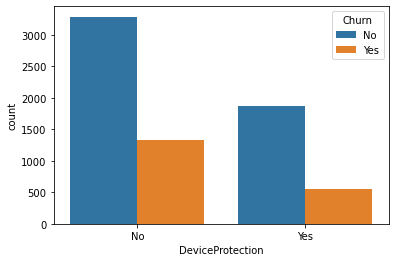

In [1043]:
sns.countplot(x='DeviceProtection',data= df1, hue='Churn')

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

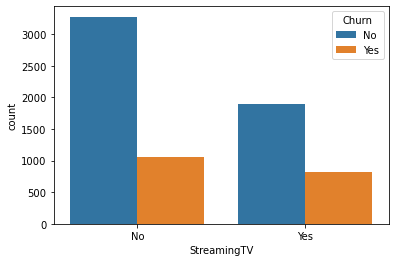

In [1044]:
sns.countplot(x='StreamingTV',data= df1, hue='Churn')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

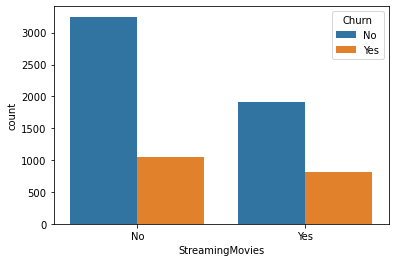

In [1045]:
sns.countplot(x='StreamingMovies',data= df1, hue='Churn')

Obervation: I can see the customers who don't have technical support have churned more. This also highlights the fact that the tech support provided by the company is up to the mark.

### Tracking numeric data

[Text(0.5, 0, 'Tenure in Month'), Text(0, 0.5, 'Count')]

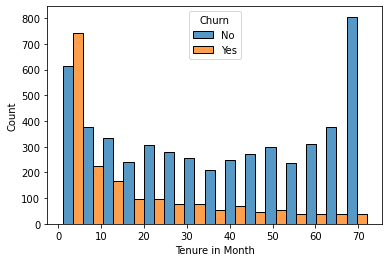

In [1046]:
ax = sns.histplot(x = 'tenure', data = df1, hue = 'Churn',multiple='dodge')
ax.set(xlabel = "Tenure in Month", ylabel = "Count")

Observation: The Churn amount is higher in the initial 5 months, which is usually the time when the new customers try out the service and decide whether to continue or cancel.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

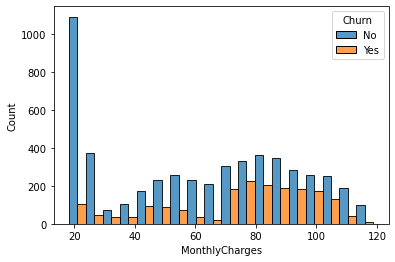

In [1047]:
sns.histplot(x = 'MonthlyCharges',hue = 'Churn',data = df1, multiple = 'dodge')

Observation: Customers who have monthly charges as high as 100 dollars have chosen not to churn. This indicates that the company has done well to retain high paying customers.

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

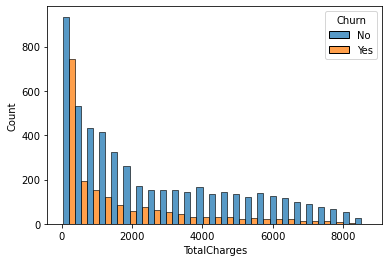

In [1048]:
sns.histplot(x = 'TotalCharges',hue = 'Churn',data = df1, multiple = 'dodge')

Observation:Those customer who pay more Charges are having high churning rate.

In [1049]:
#Defining the histogram plotting function
def hist(feature):
    group_df = df1.groupby([feature,'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df,x=feature,y='Count',color ='Churn',marginal='box',title=f'Churn rate frquency to {feature} distribution',color_discrete_sequence=["green","red"])
    fig.show()

In [1050]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

Observation: The tenure histogram is rightly skewed and shows that most customers have been with the telecom company for just the first few monthd(0-9 months). The highest rate of churn is also in the first few months(0-9). 3/4 rd of customer i.e.75% who end up leaving the telecom Company do so within their first 30 months. The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate. This suggest that discount and promotions can be an enticing reson for customer to stay.
    

# Step 4: Data Preprocessing and Feature Engineering

In this section, i gain more insights and convert the data into a data representation suitable for various machine learning algorithms.

In [1051]:
yes_no_columns ={'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'}
for col in yes_no_columns:
    df1[col].replace( {'Yes':1,'No':0}, inplace = True )

In [1052]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [1053]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [1054]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [1055]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [1056]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2103,0,1,1,0,11,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5303,0,0,0,1,43,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
4577,1,1,1,0,62,1,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [1057]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [1058]:
#Scaling
cols_to_scale = ['MonthlyCharges','TotalCharges','tenure'] 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(round(df2[cols_to_scale]))


In [1059]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

# Step 5: Spliting the data into train and test sets

In [1077]:
X=df2.drop('Churn',axis=1)
y=df2['Churn']

In [1078]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [1079]:
X_train.shape

(4922, 26)

In [1080]:
X_test.shape

(2110, 26)

Let's start creating a baseline model with a Logistic Regressionalgorithm,then predict with other machine learning models like Support Vector Classifier(SVC),Random Forest Classifier,Decision-tree Classifier and Naive-Byes Classifier

In [1081]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1675,1,0,0,0,0.394366,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4154,0,0,0,0,0.070423,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5542,1,0,1,0,0.929577,1,1,0,1,1,...,1,0,0,0,0,1,1,0,0,0
3039,0,1,1,0,1.000000,0,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
3671,1,0,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6687,1,1,1,0,0.014085,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6497,0,0,0,0,0.718310,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
834,1,1,0,0,0.042254,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5706,1,0,0,0,0.000000,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6761,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [1082]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')


Logistic Regression
accuracy:  0.8123222748815165
precision:  0.6597077244258872
recall:  0.575591985428051
f1_score:  0.8079903388581916


In [1083]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.8066350710900474
precision:  0.6613272311212814
recall:  0.5264116575591985
f1_score:  0.7990011949155599


In [1084]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.79478672985782
precision:  0.6294642857142857
recall:  0.5136612021857924
f1_score:  0.7876076875069096


In [1085]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7426540284360189
precision:  0.505338078291815
recall:  0.517304189435337
f1_score:  0.7436216185753581


In [1086]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.7407582938388626
precision:  0.5011655011655012
recall:  0.7832422586520947
f1_score:  0.7549866538680461


In [1087]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

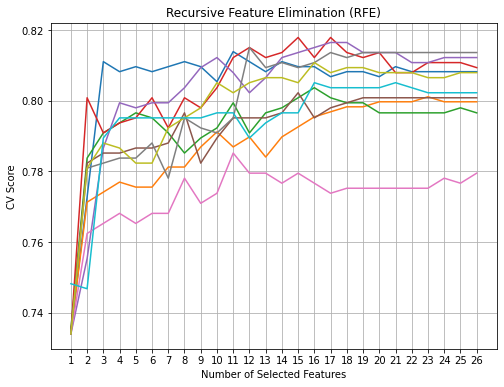

The optimal number of features: 17


In [1089]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))
#Customer churn - features elimination

# Step 6: Pickeling Model 

In [1106]:
#Saving best model 
import pickle
#Sava the model to disk
filename = 'model.pickel'
joblib.dump(log_model, filename)

['model.pickel']